In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Social_Network_Ads.csv')
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


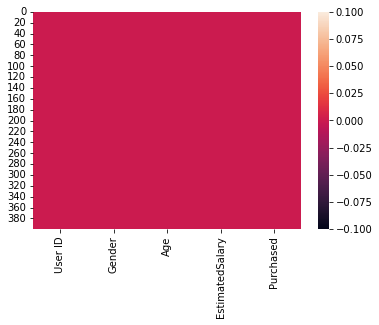

In [10]:
import seaborn as sns
sns.heatmap(df.isnull())

In [11]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df['Gender'].replace({'Male' :0, 'Female' : 1}, inplace = True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [15]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [16]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000
...,...,...,...,...
395,15691863,1,46,41000
396,15706071,0,51,23000
397,15654296,1,50,20000
398,15755018,0,36,33000


In [17]:
y


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)


In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


In [21]:
std.mean_

array([1.569101e+07, 5.100000e-01, 3.624000e+01, 7.022000e+04])

In [22]:
X_test

array([[ 0.47063377, -1.02020406, -0.54748976,  0.5130727 ],
       [-0.52442049,  0.98019606,  0.15442019, -0.61825566],
       [ 1.16584067, -1.02020406, -0.10879604,  0.14615539],
       [ 0.64432684,  0.98019606, -0.54748976,  0.26846116],
       [-0.71996781,  0.98019606, -0.10879604, -0.61825566],
       [ 1.67056653, -1.02020406, -0.81070599, -1.53554892],
       [-1.09841712,  0.98019606, -0.45975102, -1.68843113],
       [-0.14157044, -1.02020406, -0.0210573 ,  2.25592989],
       [-0.3377833 ,  0.98019606, -1.60035469, -0.0678797 ],
       [-0.93083619, -1.02020406,  0.94406888, -0.83229075],
       [-0.02152827, -1.02020406, -0.54748976, -0.6488321 ],
       [ 1.48118568,  0.98019606, -0.72296725, -0.46537345],
       [ 1.11970091, -1.02020406,  0.06668145, -0.46537345],
       [-1.51849682, -1.02020406,  0.24215893,  0.20730828],
       [ 0.74878988, -1.02020406, -1.4248772 ,  0.48249625],
       [ 1.33243009,  0.98019606, -0.37201227,  1.43036596],
       [ 0.944799  , -1.

In [24]:
df.shape

(400, 5)

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy of the model

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [29]:
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, model.predict(X_test))
rec_score = recall_score(y_test, model.predict(X_test))
print("Model Logistic Regression")
print("Accuracy Score : ", acc_score)
print("Recall Score : ", rec_score)


Model Logistic Regression
Accuracy Score :  0.88
Recall Score :  0.78125


In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 7, 25]])

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

63 5 7 25


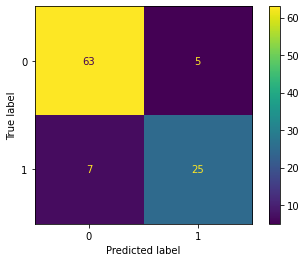

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()